In [2]:
import collections
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import tqdm

from post_to_new_libs_and_pairs import collect_post_count_to_new_libs_and_pairs

In [3]:
LANGUAGES = {
    "java": "Java",
    "c#": "C#",
    "python": "Python",
    "r": "R",
    "swift": "Swift",
    "perl": "Perl",
    "javascript": "Javascript",
    "php": "PHP",
    "ruby": "Ruby",
    "rust": "Rust",
    "cpp": "C++",
    "objectivec": "Objective C",
}

DOING LIMIT:  10


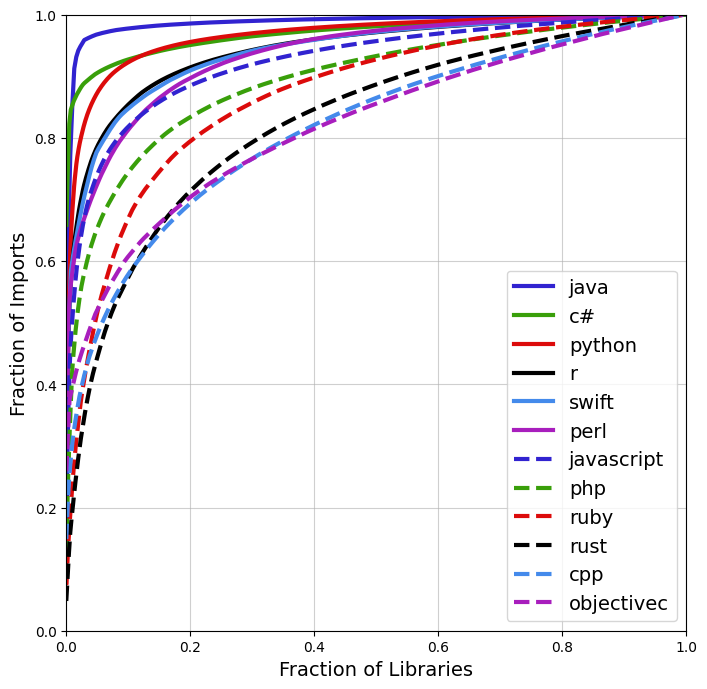

In [10]:
for APPEARANCE_LOWER_LIMIT in [10]:#[0, 10, 50, 100]:
    print("DOING LIMIT: ", APPEARANCE_LOWER_LIMIT)
    plt.figure(figsize=(8,8))


    
    colors = (
        "#3123D0",  # chrysler_blue
        "#399F0A",  # forest_green
        "#DC0B0B",  # ripe_red
        "black",
        "#448AEB",  # mellow_blue
        "#A81EBD",  # dark_violet
    )
    
    over_thresholds = {
        language: {
            50: None,
            80: None,
            90: None,
            "Libraries": None,
            "Imports": None,
        } for language in LANGUAGES
    }
    
    for i, language in enumerate(LANGUAGES):
        #print(f"Processing {language}")
        path_to_lib = f"data/results/{language}"

        #print("\t Opening resources...")
        
        with open(f"{path_to_lib}/{language}_libs_count.json") as handle:
             d={k:v for k, v  in json.load(handle).items() if v > APPEARANCE_LOWER_LIMIT}
        d2=list(d.values())
       
        sorted_data=sorted(d2,reverse=True)
        normalized = [x/sum(sorted_data) for x in sorted_data]
        cumulative = np.cumsum(normalized)

        for threshold in [50, 80, 90]:
            percentile = round(threshold / 100, 2)
            index = np.where(cumulative > percentile)[0][0]
            over_threshold = index/len(cumulative)
            over_thresholds[language][threshold] = round(over_threshold, 3)

        over_thresholds[language]["Libraries"] = len(d.keys())
        over_thresholds[language]["Imports"] = sum(d.values()) 
        
        plt.plot(
            [x/len(cumulative) for x in range(len(cumulative))],
            cumulative,
            linestyle="-" if i < 6 else "--",
            color=colors[i % len(colors)],
            linewidth=3,
            label= language,
        )
        #plt.axvline(
        #    over_threshold,
        #    color='black',
        #    linestyle='--',
        #)
    plt.grid(alpha=.6)
    plt.ylim([0,1])
    plt.xlim([0,1])
    plt.ylabel('Fraction of Imports',size=14)
    plt.xlabel('Fraction of Libraries',size=14)
    plt.legend(fontsize=14, loc="lower right")
    plt.savefig("concentration.png")               

In [5]:
LANGUAGES = {
    "java": "Java",
    "c#": "C#",
    "python": "Python",
    "r": "R",
    "swift": "Swift",
    "perl": "Perl",
    "javascript": "Javascript",
    "php": "PHP",
    "ruby": "Ruby",
    "rust": "Rust",
    "cpp": "C++",
    "objectivec": "Objective C",
}

In [6]:
th_d = []
for k, v in over_thresholds.items():
    v.update({"Language": k.capitalize()})
    th_d.append(v)

df = pd.DataFrame(th_d, columns=["Language", "Libraries", "Imports", 50, 80, 90])
df

,Language,Libraries,Imports,50,80,90
0,Java,310,508724,0.003,0.010,0.013
1,C#,409,169781,0.000,0.005,0.044
2,Python,4366,2469502,0.004,0.024,0.070
3,R,1669,528278,0.004,0.058,0.166
4,Swift,268,83549,0.007,0.063,0.183
5,Perl,279,119065,0.004,0.093,0.208
6,Javascript,2205,413073,0.010,0.084,0.238
7,Php,936,106829,0.017,0.153,0.361
8,Ruby,385,48770,0.047,0.208,0.408
9,Rust,465,30995,0.069,0.312,0.540
